# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nadila Agustiani Farhan]
- **Email:** [nadilaagustiani1010@gmail.com]
- **ID Dicoding:** []

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan bisnis dalam beberapa bulan terakhir
- Berdasarkan cuaca, bagaimana jumlah sebaran pelanggan?
- Bagaimana perbandingan jumlah pelanggan casual dan register saat weekday?
- Kapan terakhir pelanggan menyewa sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hours_df = pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- tipe data dteday perlu diubah ke datetime
- Kedua table memiliki data yang serupa, hanya saja yang membedakan adalah kolom hr yang ada pada hour
- Semua data sudah lengkap
- Tipe data dteday perlu diubah ke datetime agar menyesuaikan dengan data tanggal pada kolom tersebut


### Assessing Data

In [4]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Data pada hour.csv tidak memiliki masalah missing value.

In [11]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada masalah missing value


In [12]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Nilai minimal pada kolom casual dan registered harusnya bernilai 1, karena minimal pelanggan pasti dimulai dengan 1.

In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tipe data pada kolom dteday perlu diubah dari object yang merupakan tipe data untuk string ke tipe datetime sesuai dengan data yang ada
- Nilai maksimum pada wethersit hanya 3 sedangkan berdasarkan penjelasan datasetnya, jumlah cuaca atau wethersit berjumlah 4
- Bisa diasumsikan terdapat human eror dalam menginput data weathersit pada table day.csv


### Cleaning Data

In [14]:
#mengubah tipe data pada kolom dteday pada table hour.csv
columns = ["dteday"]

for colom in columns:
  hours_df[colom] = pd.to_datetime(hours_df[colom])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
#Mengubah tipe data dtday pada table day.csv
date_convert = ["dteday"]

for colum in date_convert:
  day_df[colum] = pd.to_datetime(day_df[colum])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# Mengubah nilai maksimum pada kolom weathersit
day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)

# Memastikan data sudah berhasil diubah
day_df[day_df.weathersit == day_df.weathersit.max()]

<ipython-input-16-e97dc5b8794e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace(day_df.weathersit.max(), 4, inplace=True)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
25,26,2011-01-26,1,0,1,0,3,1,4,0.217500,0.203600,0.862500,0.293850,34,472,506
68,69,2011-03-10,1,0,3,0,4,1,4,0.389091,0.385668,0.000000,0.261877,46,577,623
89,90,2011-03-31,2,0,3,0,4,1,4,0.268333,0.257575,0.918333,0.217646,179,1506,1685
105,106,2011-04-16,2,0,4,0,6,0,4,0.430833,0.425492,0.888333,0.340808,121,674,795
248,249,2011-09-06,3,0,9,0,2,1,4,0.540000,0.515200,0.886957,0.343943,204,2506,2710
249,250,2011-09-07,3,0,9,0,3,1,4,0.599167,0.544229,0.917083,0.097021,118,1878,1996
250,251,2011-09-08,3,0,9,0,4,1,4,0.633913,0.555361,0.939565,0.192748,153,1689,1842
284,285,2011-10-12,4,0,10,0,3,1,4,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,4,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,4,0.254167,0.227913,0.882500,0.351371,57,570,627


In [20]:
# Mengubah nilai minimal casual dan registered menjadi 1 pada tabel hour
hours_df.casual.replace(hours_df.casual.min(), 1, inplace=True)
hours_df.registered.replace(hours_df.registered.min(), 1, inplace=True)

<ipython-input-20-2a86f971529a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.casual.replace(hours_df.casual.min(), 1, inplace=True)
<ipython-input-20-2a86f971529a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [21]:
hours_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.767190,153.788250,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.239997,151.355887,181.387599


Untuk memudahkan melihat musim, kita akan membuat kolom baru untuk menambah nama musim berdasarkan pada kolon season dengan method map()
1. springer
2. summer
3. fall
4. winter

In [22]:
day_df['season_desc']= day_df['season'].map({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

Untuk memudahkan melihat cuaca, kita membuat kolom baru untuk menambah nama cuaca berdasarkan pada kolon season dengan method map()

In [23]:
# Melihat sebaran pelanggan berdasarkan cuaca
# Menambahkan kolom terlebih dahulu untuk nama cuaca
day_df['weathersit_desc'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
})

In [24]:
# menambah nama untuk kolom bulan
day_df['mnth_desc'] = day_df['mnth'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_desc,weathersit_desc,mnth_desc
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,springer,Cloudy,January
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,springer,Clear,January
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,springer,Clear,January
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,springer,Clear,January


In [25]:
# Mengubah kolom mnth_desc menjadi kategori terurut
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
day_df['mnth_desc'] = pd.Categorical(day_df['mnth_desc'], categories=month_order, ordered=True)

**Insight:**
- Nilai maksimum pada kolom weather sudah diubah menjadi empat sesuai dengan keterangan yang ada dalam dataset.
- Tipe data dteday sudah sesuai dengan tipe data datetime
- Nilai minimal casual dan registered sudah diubah menjadi 1, sehingga kolom cnt langsung berubah.

## Exploratory Data Analysis (EDA)

### Explore data

In [32]:
#Melihat rangkuman statistik
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.767190,153.788250,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.239997,151.355887,181.387599


In [33]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_desc,weathersit_desc,mnth_desc
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fall,Clear,January
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,463,62
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.424077,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN,NaN


In [34]:
# Jumlah rata-rata seluruh pelanggan berdasarkan waktu
hours_df.groupby(by="hr").agg({
    "cnt": "mean"
})

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [29]:
#Melihat jumlah pelanggan yang sudah teregistrasi berdasarkan per hari
day_df.groupby(by="dteday").agg({
    "dteday": "nunique",
    "registered": "sum"
})

,dteday,registered
dteday,,
2011-01-01,1,654
2011-01-02,1,670
2011-01-03,1,1229
2011-01-04,1,1454
2011-01-05,1,1518
...,...,...
2012-12-27,1,1867
2012-12-28,1,2451
2012-12-29,1,1182


In [30]:
# Jumlah pelanggan casual dan register berdasarkan musim tiap bulan
day_df.groupby(by=["season", "mnth"]).agg({
    "casual":"sum",
    "registered": "sum"
}).sort_values(by=["season", "mnth"], ascending=False)

casual  registered
season mnth                    
4      12     15230      152808
       11     36603      218228
       10     59760      262592
       9      18189       78203
3      9      52134      197465
       8      72039      279155
       7      78157      266791
       6      23761       91627
2      6      50145      180809
       5      75285      256401
       4      60802      208292
       3      17290       69565
1      12      6463       36535
       3      27154      114911
       2      14963      136389
       1      12042      122891

- Jumlah data pelanggan casual paling banyak berada pada season 3, bulan 7.
- Sedangkan jumlah pelanggan yang teregistrasi yang paling banyak ada pada season 3 dan bulan 8

In [31]:
# merge kedua tabel
'''kedua tabel memiliki jenis kolom yang sama, hanya kolom hr yang membedakan antara table hour dan table day'''

df = hours_df.merge(day_df, how="left", left_on="dteday", right_on="dteday")
df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,season_desc,weathersit_desc,mnth_desc
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.344167,0.363625,0.805833,0.160446,331,654,985,springer,Cloudy,January


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_x        17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_x         17379 non-null  int64         
 3   yr_x             17379 non-null  int64         
 4   mnth_x           17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_x        17379 non-null  int64         
 7   weekday_x        17379 non-null  int64         
 8   workingday_x     17379 non-null  int64         
 9   weathersit_x     17379 non-null  int64         
 10  temp_x           17379 non-null  float64       
 11  atemp_x          17379 non-null  float64       
 12  hum_x            17379 non-null  float64       
 13  windspeed_x      17379 non-null  float64       
 14  casual_x         17379 non-null  int64

In [36]:
# Sebaran jumlah pelanggan dan penyewaan setiap bulan
df.groupby(by="mnth_desc").agg({
    "instant_y": "count",
    "cnt_y": "sum"
}).reset_index()

<ipython-input-36-36408d1f6626>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by="mnth_desc").agg({


,mnth_desc,instant_y,cnt_y
0,January,1429,3184341
1,February,1341,3582161
2,March,1473,5463600
3,April,1437,6444110
4,May,1488,7960464
5,June,1440,8312208
6,July,1488,8278752
7,August,1475,8391628
8,September,1437,8294519
9,October,1451,7719270


Jumlah penyewaan setiap bulan hampir stabil. Namun jika dilihat dari jumlah pelanggan, peningkatan jumlah pelanggan terjadi antara januari hingga agustus dan kembali menurut dari september hingga akhir tahun.

In [37]:
#Melihat sebaran pelanggan berdasarkan musim
df.groupby(by="season_desc").agg({
    "instant_y": "count",
    "cnt_y": "sum"
}).reset_index()

,season_desc,instant_y,cnt_y
0,fall,4496,25420803
1,springer,4242,11179147
2,summer,4409,22024071
3,winter,4232,20167029


Jadi, jumlah penyewaan yang paling banyak adalah saat musim gugur

In [38]:
# Melihat info sebaran pelanggan casual registered berdasarkan cuaca
df.groupby(by=["weathersit_desc"]).agg({
    "casual_y":"mean",
    "registered_y": "mean"
})

,casual_y,registered_y
weathersit_desc,,
Clear,968.118388,3927.058696
Cloudy,692.741271,3369.976324
Heavy Rain,197.561966,1717.138889


Rata-rata pelanggan yang paling banyak ketika cuaca sedang cerah

In [39]:
# Melihat info terakhir penyewaan
df.groupby(by="mnth_desc").agg({
    "dteday": "max",
    "instant_y": "count"
})

<ipython-input-39-bb464b5758ce>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by="mnth_desc").agg({


,dteday,instant_y
mnth_desc,,
January,2012-01-31,1429
February,2012-02-29,1341
March,2012-03-31,1473
April,2012-04-30,1437
May,2012-05-31,1488
June,2012-06-30,1440
July,2012-07-31,1488
August,2012-08-31,1475
September,2012-09-30,1437


Penyewaan terakhir berlangsung pada akhir bulan Desember

In [40]:
# Melihat perbandingan pelanggan casual dan registered saat weekday
df.groupby(by="weekday_y").agg({
    "casual_y": "sum",
    "registered_y": "sum"
})

,casual_y,registered_y
weekday_y,,
0,3356919,7250325
1,1692494,9195078
2,1384586,9817549
3,1373184,9948974
4,1473676,10148681
5,1875835,9815150
6,3690876,7767723


**Insight:**
- Jumlah penyewaan setiap bulan hampir stabil. Namun jumlah pelanggan meningkat antara januari hingga agustus dan kembali menurun dari september hingga akhir tahun.
- Rata-rata pelanggan menyewa sepeda ketika sore/senja
- Pelanggan paling banyak menyewa sepeda saat cuaca cerah dan di musim gugur
- Registrasi pelanggan paling banyak saat tanggal 31 Desember 2012
- Saat weekday, jumlah pelanggan register lebih banyak dibanding casual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan bisnis dalam beberapa bulan terahkhir?

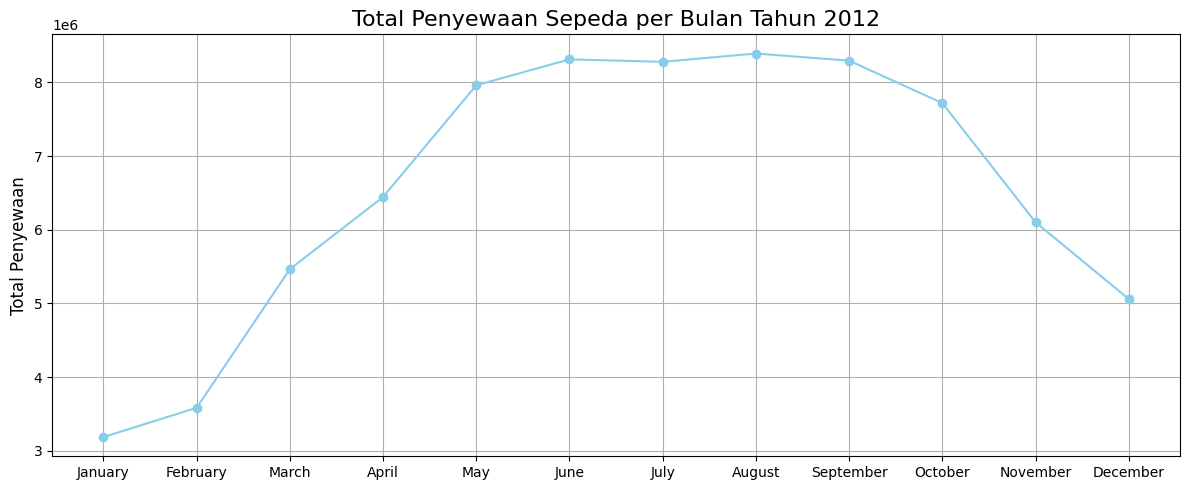

In [41]:
# Menghitung total penyewaan per bulan
daily_rentals = df.groupby('mnth_desc', observed=True).agg({'cnt_y': 'sum'}).reset_index()

# Visualisasi
plt.figure(figsize=(12, 5))
plt.plot(
    daily_rentals['mnth_desc'],
    daily_rentals['cnt_y'],
    marker='o',
    color='skyblue'
)

plt.title('Total Penyewaan Sepeda per Bulan Tahun 2012', loc="center", fontsize=16)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.xticks( fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

*** Insight
- Jumlah penyewaan sepeda mengalami peningkatan dari Januari hingga Juni
- Juni hingga september stabil
- Oktober hingga desember mengalami penurunan yang signifikan

### Pertanyaan 2:Berdasarkan cuaca, bagaimana jumlah sebaran pelanggan?

  weathersit_desc     cnt_y
0           Clear  54042755
1          Cloudy  23852215
2      Heavy Rain    896080


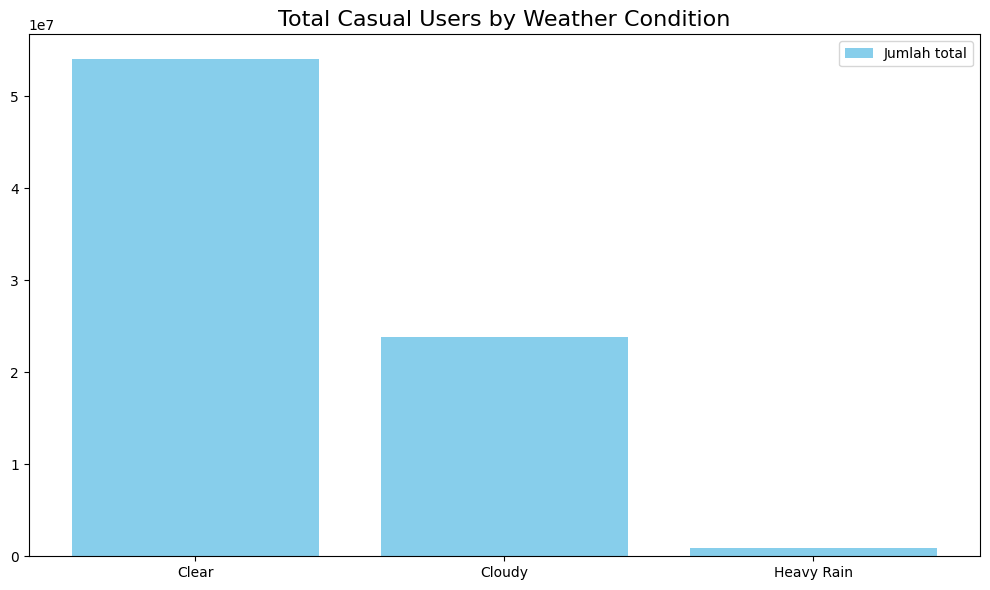

In [44]:
result_weather = df.groupby(by="weathersit_desc").agg({
    "cnt_y": "sum"
}).reset_index()
print(result_weather)

plt.figure(figsize=(10, 6))
plt.bar(
        result_weather["weathersit_desc"],
        result_weather["cnt_y"],
        color="skyblue",
        label="Jumlah total")

plt.title("Total Casual Users by Weather Condition", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)

plt.legend()
plt.tight_layout()

plt.show()


### Pertanyaan 3: Bagaimana perbandingan jumlah pelanggan casual dan registered di saat weekday?

Perbandingan Jumlah Pelanggan Casual dan Registered saat Weekday


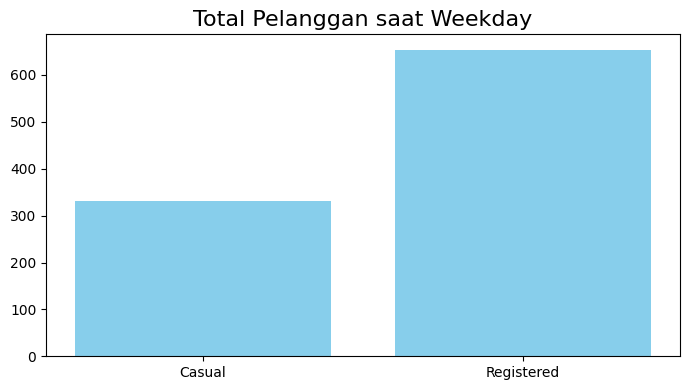

In [45]:
print("Perbandingan Jumlah Pelanggan Casual dan Registered saat Weekday")

plt.figure(figsize=(7, 4))
labels = ['Casual', 'Registered']

casual_count = day_df['casual'].values[0]
registered_count = day_df['registered'].values[0]

plt.bar(labels, [casual_count, registered_count], color=['skyblue', 'skyblue'])

plt.title("Total Pelanggan saat Weekday", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

<ipython-input-46-f16476ce4e7f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="casual", y="mnth_desc", data=month, palette=colors, ax=ax[0])


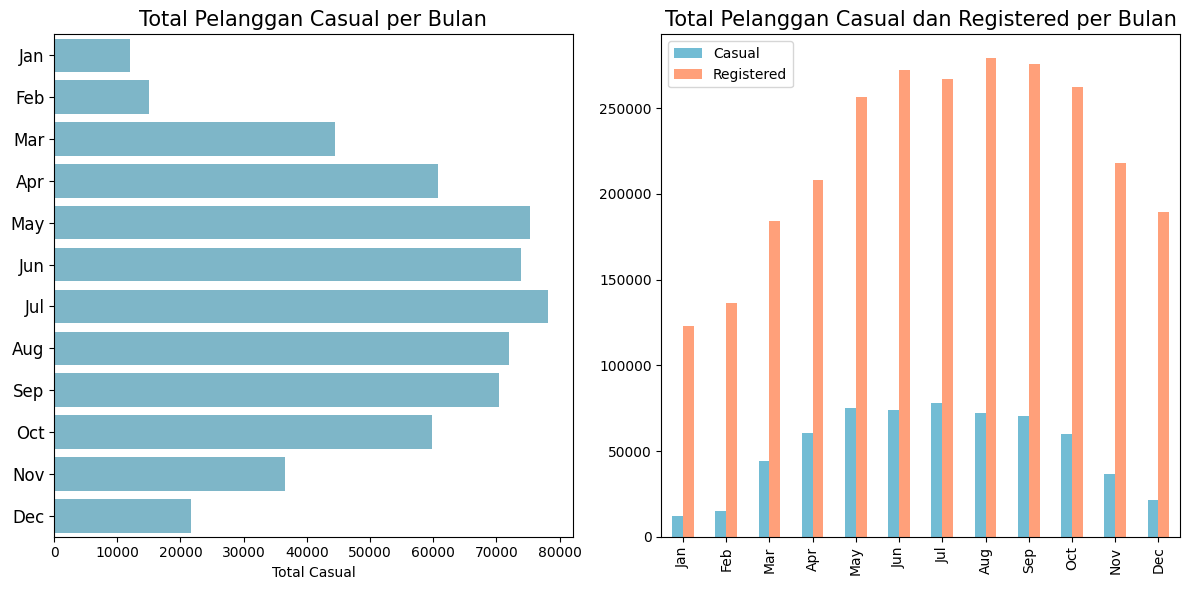

In [46]:
# Perbandingan casual dan registered setiap bulan
month = day_df.groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

if "mnth_desc" not in month.columns:
    month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    month["mnth_desc"] = month["mnth"].apply(lambda x: month_names[x - 1])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

colors = ["#72BCD4"] * len(month)
sns.barplot(x="casual", y="mnth_desc", data=month, palette=colors, ax=ax[0])
ax[0].set_xlabel("Total Casual")
ax[0].set_ylabel(None)
ax[0].set_title("Total Pelanggan Casual per Bulan", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

month.plot(x="mnth_desc", y=["casual", "registered"], kind="bar", ax=ax[1], color=["#72BCD4", "#FFA07A"])
ax[1].set_title("Total Pelanggan Casual dan Registered per Bulan", fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].legend(["Casual", "Registered"])

plt.tight_layout()
plt.show()


### Pertanyaan 4: Kapan penyewaan terakhir berlangsung?

<ipython-input-47-a6ef3c2bcb46>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_date = df.groupby(by="mnth_desc", as_index=False).agg({


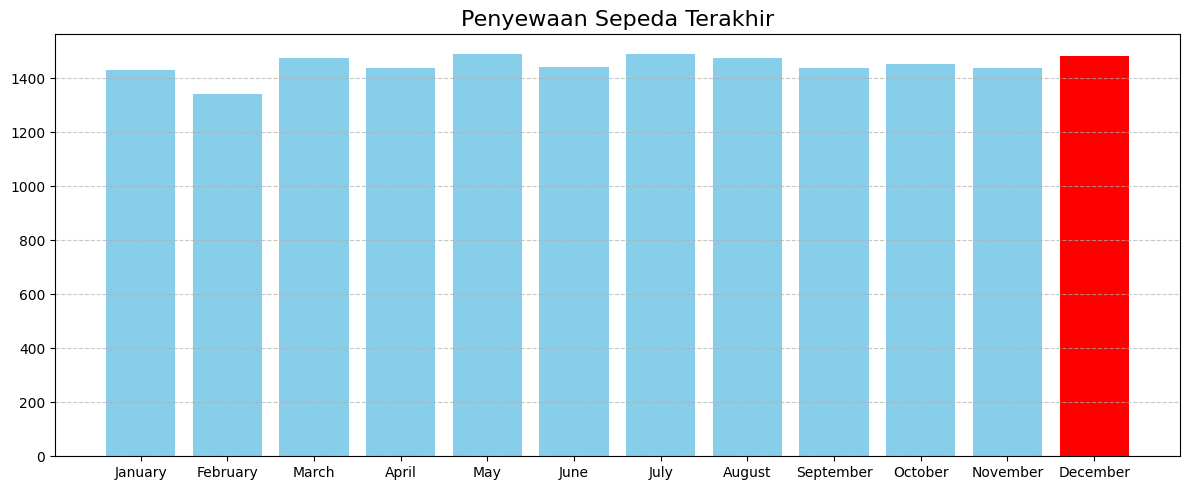

In [47]:
max_date = df.groupby(by="mnth_desc", as_index=False).agg({
    "dteday": "max",
    "instant_x": "nunique"
})
colors = ['red' if i == len(max_date) - 1 else 'skyblue' for i in range(len(max_date))]

plt.figure(figsize=(12, 5))
plt.bar(
    max_date["mnth_desc"],
    max_date["instant_x"],
    data=max_date,
    color=colors
)

plt.title('Penyewaan Sepeda Terakhir', loc="center", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

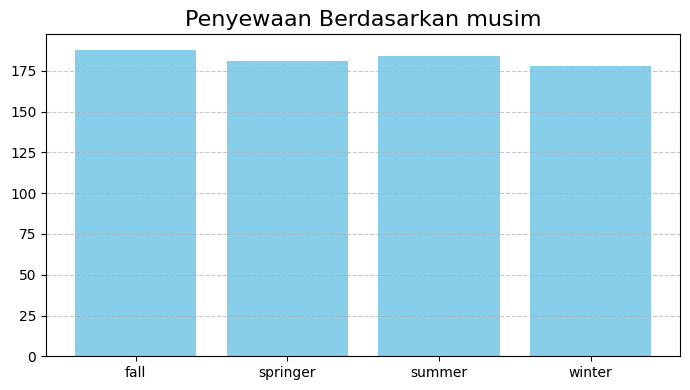

In [48]:
# Informasi penyewaan berdasarkan musim
data = df.groupby(by="season_desc", as_index=False).agg({
    "instant_y": "nunique"
})

plt.figure(figsize=(7, 4))

plt.bar(data["season_desc"], data["instant_y"], data=data, color=['skyblue', 'skyblue'])

plt.title('Penyewaan Berdasarkan musim', loc="center", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Axes: >

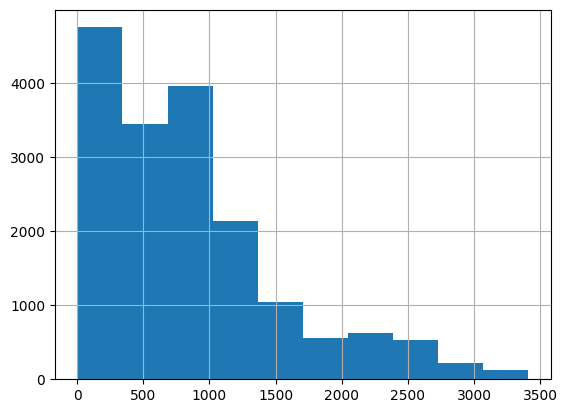

In [49]:
# Histogram data pelanggan casual
df.casual_y.hist()

<Axes: >

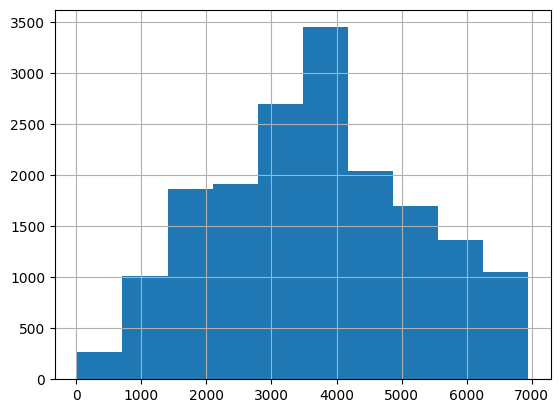

In [50]:
# Histogram data pelanggan registered
df.registered_y.hist()

**Insight:**
- Penyewaan sepeda dominan dalam satu tahun meningkat antara bulan 5 sampai 8
- Berdasarkan cuaca, sebaran pelanggan lebih banyak Ketika cerah dan menurun saat hujan lebat
- Saat Weekday jumlah pelanggan yang teregistrasi lebih banyak dibanding pelanggan casual.
- Penyewaan terakhir berlangsung di bulan desember

In [51]:
df.to_csv("all_data.csv", index=False)

## Conclusion

Berdasarkan analisis data penyewaan sepeda menggunakan dataset Bike-sharing, berikut beberapa temuan utama yang bisa menjawab pertanyaan bisnis terkait tren penyewaan dalam beberapa bulan terakhir, pengaruh cuaca, perbedaan jumlah pelanggan casual dan pelanggan yang sudah terdaftar serta waktu terakhir pelanggan menyewa sepeda.

1. Perkembangan Bisnis dalam Beberapa Bulan Terakhir
- Jumlah penyewaan sepeda mengalami peningkatan sejak awal tahun dan mencapai puncaknya antara Mei hingga Agustus.
- Kemudian, jumlah penyewaan mulai stabil hingga September, kemudian mengalami penurunan signifikan dari Oktober hingga Desember.
- Secara umum, bisnis penyewaan sepeda berjalan cukup stabil di pertengahan tahun dan mengalami penurunan di akhir tahun.
2. Jumlah Sebaran Pelanggan Berdasarkan Cuaca
- Cuaca berperan besar dalam jumlah penyewaan sepeda. Pelanggan cenderung lebih banyak menyewa saat cuaca cerah, sementara jumlah penyewaan menurun drastis saat hujan lebat.
- Musim gugur menjadi salah satu periode dengan jumlah penyewaan yang cukup tinggi, terutama saat cuaca mendukung.
3. Perbandingan Jumlah Pelanggan Casual dan Register saat Weekday
- Saat hari kerja (weekday), pelanggan yang sudah terdaftar (registered) jauh lebih banyak dibandingkan pelanggan casual.
Ini menunjukkan bahwa pelanggan tetap lebih sering menggunakan layanan penyewaan sepeda untuk aktivitas rutin, seperti perjalanan ke kantor atau keperluan sehari-hari.
- Sebaliknya, pelanggan casual cenderung lebih banyak terlihat di akhir pekan (weekend) ketika mereka lebih santai dan mungkin menyewa sepeda untuk rekreasi.
4. Penyewaan Sepeda terakhir
Penyewaan terakhir yang tercatat dalam dataset terjadi pada 31 Desember 2012, menandakan bahwa layanan ini tetap aktif hingga penghujung tahun.
Menariknya, pada tanggal yang sama juga terjadi lonjakan registrasi pelanggan, yang bisa jadi karena adanya promo akhir tahun atau persiapan penggunaan layanan di tahun berikutnya.

Secara keseluruhan, bisnis penyewaan sepeda menunjukkan tren positif di pertengahan tahun dan dipengaruhi cukup besar oleh faktor cuaca. Pelanggan yang sudah terdaftar lebih dominan saat hari kerja, sementara pelanggan casual lebih banyak di akhir pekan. Mengetahui pola ini bisa membantu dalam strategi promosi dan pengelolaan layanan ke depannya.





